In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.cross_validation import train_test_split
from sklearn.metrics import confusion_matrix

In [23]:
df = pd.read_csv('Hotel_Unique_Complete.csv')
df = df.fillna(0)
numeric_DF = df._get_numeric_data()
x = numeric_DF.values
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0, 1))
x_scaled = min_max_scaler.fit_transform(x)
numeric_DF = pd.DataFrame(x_scaled,columns = numeric_DF.columns)

In [24]:
X,y = numeric_DF.iloc[:,:-1].values, numeric_DF["Overall_Label"].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33, random_state = 0,stratify=y)

In [25]:
X_train = pd.DataFrame(data=X_train,,columns = feat_labels)
X_test = pd.DataFrame(data=X_test)
y_train = pd.DataFrame(data=y_train)
y_test = pd.DataFrame(data=y_test) 

In [18]:
# X_train = X_train.rename(columns={'Num_reviews': 'Num_Reviews', 
#                           'Num_likes':'Num_Likes',
#                           'countsverbs':'Count_Verbs','countsnouns':'Count_Nouns',
#                           'duplicateusertimesaggregated':'Num_Reviews_DuplicateUser',
#                           'diff<=5':'Interval_Days5',
#                           'Overall_Label':'Fake_Review'})
# y_train = X_train.rename(columns={'Overall_Label':'Fake_Review'})
# X_test = X_test.rename(columns={'Num_reviews': 'Num_Reviews', 
#                           'Num_likes':'Num_Likes',
#                           'countsverbs':'Count_Verbs','countsnouns':'Count_Nouns',
#                           'duplicateusertimesaggregated':'Num_Reviews_DuplicateUser',
#                           'diff<=5':'Interval_Days5',
#                           'Overall_Label':'Fake_Review'})    
# y_test = y_test.rename(columns={'Overall_Label':'Fake_Review'})    

In [26]:
feat_labels = numeric_DF.columns[:-1]
forest = RandomForestClassifier(n_estimators = 100, random_state = 0, n_jobs=-1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indices = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30, feat_labels[f], importances[indices[f]]))

/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


 1) Num_reviews                    0.032564
 2) Num_likes                      0.032290
 3) duplicateusertimesaggregated   0.030777
 4) diff<=5                        0.029987
 5) Count_Susp_words               0.025739
 6) hotel                          0.016941
 7) room                           0.015734
 8) stay                           0.013167
 9) get                            0.012516
10) would                          0.011721
11) service                        0.011469
12) one                            0.010928
13) check                          0.010501
14) night                          0.010473
15) call                           0.010001
16) staff                          0.009406
17) go                             0.009380
18) desk                           0.008872
19) say                            0.008787
20) like                           0.008379
21) front                          0.008372
22) rooms                          0.008352
23) nice                        

In [28]:
# feature_importances = pd.DataFrame(forest.feature_importances_,index = X_train.columns,columns=['importance']).sort_values('importance',ascending=True)

# sum(feature_importances[148:]['importance'])

# feature_importances[148:].plot(kind='barh')


                               Num_reviews  Num_likes  \
Num_reviews                   1.693445e-03   0.000765   
Num_likes                     7.647787e-04   0.000703   
duplicateusertimesaggregated  8.261387e-04   0.000364   
diff<=5                       2.138578e-04   0.000182   
Count_Susp_words              1.316720e-04   0.000240   
hotel                         7.107769e-05   0.000183   
room                          1.115678e-04   0.000171   
stay                         -5.240098e-05   0.000080   
get                           3.011667e-05   0.000078   
would                         1.254499e-05   0.000081   
service                       3.824335e-05   0.000111   
one                           1.074015e-04   0.000148   
check                         4.172004e-05   0.000124   
night                         5.565872e-05   0.000103   
call                         -2.811495e-05   0.000033   
staff                        -3.683162e-05  -0.000007   
go                           -4

                              Num_reviews  Num_likes  \
Num_reviews                      1.000000   0.701098   
Num_likes                        0.701098   1.000000   
duplicateusertimesaggregated     0.172667   0.118196   
diff<=5                          0.040313   0.053242   
Count_Susp_words                 0.049729   0.140631   
hotel                            0.021462   0.085875   
room                             0.036163   0.086266   
stay                            -0.015579   0.036971   
get                              0.010819   0.043764   
would                            0.005269   0.052654   
service                          0.020159   0.090518   
one                              0.036716   0.078504   
check                            0.012392   0.057132   
night                            0.026882   0.077268   
call                            -0.012818   0.023293   
staff                           -0.011677  -0.003531   
go                              -0.018241   0.01

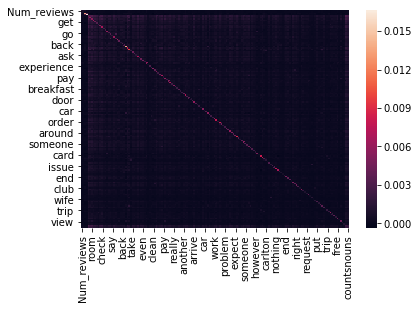

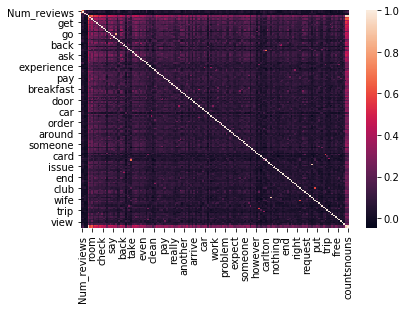

In [9]:
SPMdf = numeric_DF[numeric_DF.columns[:-1]]
covariance = SPMdf.cov()
print(covariance)
correlations = SPMdf.corr()
print(correlations)

sns.heatmap(covariance)
plt.show()
sns.heatmap(correlations)
plt.show()

In [15]:
# #random forest with gini index compareable data
# from sklearn.ensemble import RandomForestClassifier
# results1 = pd.DataFrame(columns=['Count of Tree','Score for Training','Score for Testing'])
# indexR = 1
# for sizeOfForest in range(1,200,10):
#     forest = RandomForestClassifier(criterion = 'gini', n_estimators=sizeOfForest, max_depth=3, random_state=0)
#     forest.fit(X_train,y_train)
#     predicted = forest.predict(X_test)
#     scoreTrain = forest.score(X_train,y_train)
#     scoreTest = forest.score(X_test,y_test)
#     results1.loc[indexR] = [sizeOfForest,scoreTrain,scoreTest]
#     indexR+=1
    
# print(results1.head(16))
# results1.pop('Count of Tree')
# ax = results1.plot()
# axe1 = plt.axes()

In [16]:
# cm = pd.DataFrame(confusion_matrix(y_test, predicted))
# sns.heatmap(cm, annot=True,vmax=0,vmin=1000)

In [17]:
# print(confusion_matrix(y_test,predicted))

In [18]:
# from sklearn.metrics import confusion_matrix, classification_report
# forest = RandomForestClassifier(criterion = 'gini', n_estimators=7, max_depth=3, random_state=0)
# forest.fit(X_train,y_train)
# predicted = forest.predict(X_test)
# scoreTrain = forest.score(X_train,y_train)
# print('\n','Mean Accuracy on Training Samples:',scoreTrain)
# scoreTest = forest.score(X_test,y_test)
# print('\n','Mean Accuracy on Testing Samples:',scoreTest)
# print(classification_report(y_test,predicted))
# print(confusion_matrix(y_test,predicted))

/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:6: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  
/Users/zhujingyao/anaconda3/lib/python3.6/si

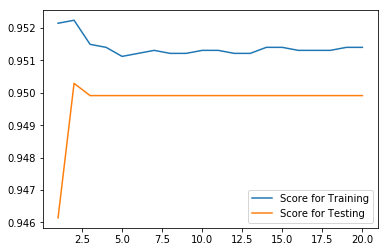

In [16]:
#random forest with entropy index compareable data
results3 = pd.DataFrame(columns=['Count of Tree','Score for Training','Score for Testing'])
indexR = 1
for sizeOfForest in range(1,200,10):
    forest = RandomForestClassifier(criterion = 'entropy', n_estimators=sizeOfForest, max_depth=7, random_state=0)
    forest.fit(X_train,y_train)
    predicted1 = forest.predict(X_test)
    scoreTrain = forest.score(X_train,y_train)
    scoreTest = forest.score(X_test,y_test)
    results3.loc[indexR] = [sizeOfForest,scoreTrain,scoreTest]
    indexR+=1
    
# print(results3.head(16))
results3.pop('Count of Tree')
ax = results3.plot()

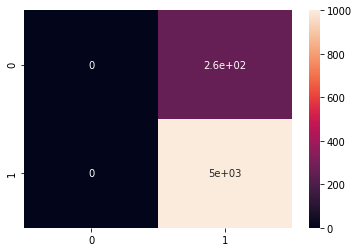

In [11]:
cm = pd.DataFrame(confusion_matrix(y_test, predicted1))
sns.heatmap(cm, annot=True,vmax=0,vmin=1000)

In [12]:
print(confusion_matrix(y_test,predicted1))

[[   0  265]
 [   0 5026]]


In [13]:
from sklearn.metrics import confusion_matrix, classification_report
forest = RandomForestClassifier(criterion = 'entropy', n_estimators=3, max_depth=7, random_state=0)
forest.fit(X_train,y_train)
predicted1 = forest.predict(X_test)
scoreTrain = forest.score(X_train,y_train)
print('\n','Mean Accuracy on Training Samples:',scoreTrain)
scoreTest = forest.score(X_test,y_test)
print('\n','Mean Accuracy on Testing Samples:',scoreTest)
print(classification_report(y_test,predicted1))
print(confusion_matrix(y_test,predicted1))


 Mean Accuracy on Training Samples: 0.9533606404766338

 Mean Accuracy on Testing Samples: 0.9491589491589492
             precision    recall  f1-score   support

        0.0       0.36      0.02      0.04       265
        1.0       0.95      1.00      0.97      5026

avg / total       0.92      0.95      0.93      5291

[[   5  260]
 [   9 5017]]


/Users/zhujingyao/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until
